# CUSTOMER SHOPPING TRENDS DATASET
## MN5813 Business Analytic Language and Platforms

*This is the Individual Assignment.*
- **2605381**
Shreny Jain

Link to github: https: https://github.com/ShrenyJain/MN5813_Individual-assignment

## Project summary

This study uses the Python language and Pandas Library to perform an analysis on a data set of customer shopping trends with the goal of revealing purchasing behavior, spending habits, and customer demographics. The dataset was originally ingested and examined to gain a broad overview of its structure, variables and data types. Preliminary data preparation included the standardization of column names, removal of duplicate records and correction of data types for important numerical attributes such as age, purchase amount, and prior number of purchases for the sake of analytical integrity.
Subsequent procedures of the data wrangling process that included grouping, aggregation, and categorization ensued to distill substantive insights. Customers were divided into age groups to analyze the differences in demographic distributions, and the differences between mean purchase amounts were examined in terms of product categories, purchase frequencies, subscription statuses, and seasonal periods. Visualisations such as bar charts, scatter plots, line charts, box plots, and pie charts were used to highlight trends in data related, for example, to different category-wise sales performance, between time periods in terms of expenditure, related to purchasing proclivities by age, and major payment modes of choice.
The project is a great example of good data cleaning, transforming and exploratory analysis techniques into the context of Pandas, from which actionable business insights regarding customer expenditure behavior are now understood, and evidence-based decision-making within retail has been enabled.

## Generative AI

Generative artificial intelligence was used to help achieve the structural organization of this project and improve the clarity of the content. Its contributions included the writing of parts of the project summary, introduction and conclusion, and thus helped the language to be clear and consistent.  Computational tools making use of AI also contributed to the ideation of procedures for data cleaning, analytical methodologies selection, as well as visualization design techniques using Python and Pandas. Nonetheless, all the code development, execution and data interpretation was performed manually to maintain academic integrity. The AI was more of a supporting writing and editing tool rather than a central data analysis or computational tool in the Olympic dataset project completion.

## Introduction

Aim  
The current project wants to test customer shopping trends data using Python and Pandas, where it aims to explain customer demographics, shopping behavior and expenditure behavior. The analysis focuses on identifying trends in product categories, frequency of purchase, seasonal variation, subscription state, and payments status which gives serious business information and assists evidence-based decision-making in a retail scenario.  

Objectives  
1. To understand the structure and variables of customer shopping trends data.  
2. To clean up the data by normalization of columns, removing duplicate entries and data types.  
3. To utilize grouping, aggregation and categorization techniques for multi dimensional analysis.  
4. To build derived features such as age groups so as to gain deeper behavioral insights.  
5. To do exploratory data analysis and find trend in customer demographics, spending and seasonality.  
6. To visualize key findings with Python and in turn communicate the findings with clarity.  
7. To generate actionable insights to support data secure decision-making in retail.

## Setup

### Import necessary libraries

In [75]:
import pandas as pd
import requests
from zipfile import ZipFile
import io
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [34]:
url = "https://raw.githubusercontent.com/ShrenyJain/MN5813_Individual-assignment/main/shopping_trends_updated.csv"



### Convert into DataFrame

In [35]:

df = pd.read_csv(url)

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [56]:
print('What columns are in our data set:')
print(df.columns)
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

What columns are in our data set:
Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'age_group'],
      dtype='object')


In [57]:
df.duplicated().sum()
df = df.drop_duplicates()


In [58]:
# Fixing Datatypes 
df['age'] = df['age'].astype(int)
df['purchase_amount_(usd)'] = df['purchase_amount_(usd)'].astype(float)
df['previous_purchases'] = df['previous_purchases'].astype(int)


## Data Wrangling

In [59]:
# Helping business prioritise marketing and strategies with data
df.groupby('category')['purchase_amount_(usd)'] \
  .mean() \
  .sort_values(ascending=False)


category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: purchase_amount_(usd), dtype: float64

In [60]:
# Analysis of spending behaviour by subscription status
df.groupby('subscription_status')['purchase_amount_(usd)'].mean()


subscription_status
No     59.865121
Yes    59.491928
Name: purchase_amount_(usd), dtype: float64

## Data Analysis

CUSTOMER STATISTICS :-

In [61]:
#Customer Count and Age Summary 
print("Total number of customers:", df["customer_id"].nunique())
print("\nAge Summary:")
print(df["age"].describe())


Total number of customers: 3900

Age Summary:
count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: age, dtype: float64


In [62]:
#Categorized Age and Number of Customers per Age Group
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-19', '20-39', '40-59', '60-79', '80-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
age_group_counts = df['age_group'].value_counts().sort_index()
print("Customers by Age Group:")
print(age_group_counts)


Customers by Age Group:
age_group
0-19      212
20-39    1462
40-59    1503
60-79     723
80-99       0
Name: count, dtype: int64


In [63]:
age_group_spending = df.groupby(
    "age_group", observed=False
)["purchase_amount_(usd)"].sum()
print(age_group_spending)



age_group
0-19     12504.0
20-39    87968.0
40-59    89445.0
60-79    43164.0
80-99        0.0
Name: purchase_amount_(usd), dtype: float64


PRODUCT PERFORMANCE ANALYSIS :-


In [64]:
#Total Sales per Category
category_sales = df.groupby("category")["purchase_amount_(usd)"].sum()

print("Total Sales by Category:")
print(category_sales)


Total Sales by Category:
category
Accessories     74200.0
Clothing       104264.0
Footwear        36093.0
Outerwear       18524.0
Name: purchase_amount_(usd), dtype: float64


In [65]:
#Category with Highest Sales
top_category = category_sales.idxmax()
top_category_sales = category_sales.max()

print("\nCategory with Highest Sales:")
print(top_category, "->", top_category_sales)



Category with Highest Sales:
Clothing -> 104264.0


In [66]:
#Top 10 Most Purchased Items
top_items = df["item_purchased"].value_counts().head(10)

print("\nTop 10 Most Purchased Items:")
print(top_items)


Top 10 Most Purchased Items:
item_purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Name: count, dtype: int64


## Data visualisation

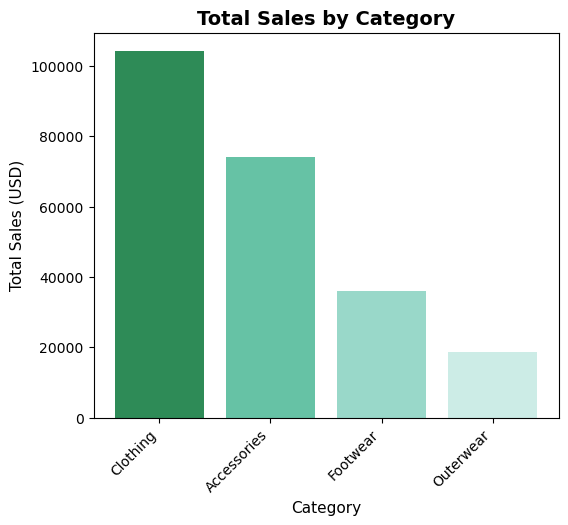

In [67]:
# Sales by category (sorted)
sales_by_category = (
    df.groupby("category")["purchase_amount_(usd)"]
    .sum().sort_values(ascending=False))
plt.figure(figsize=(6, 5))
colors = ["#2e8b57", "#66c2a5", "#99d8c9", "#ccece6"]
bars = plt.bar(
    sales_by_category.index,
    sales_by_category.values,
    color=colors)
plt.title("Total Sales by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=11)
plt.ylabel("Total Sales (USD)", fontsize=11)
plt.xticks(rotation=45, ha="right");



The bar chart provided here compares mean expenditures within different types of product categories, so that the high value segments can be quickly identified.

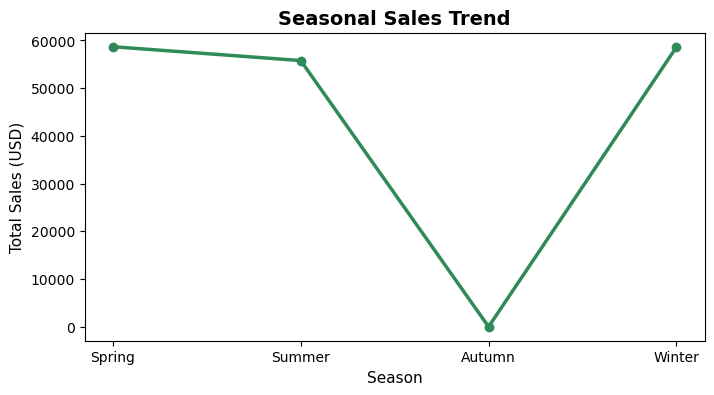

In [81]:
seasonal_sales_filled = (
    df.groupby('season')['purchase_amount_(usd)']
    .sum()
    .reindex(['Spring', 'Summer', 'Autumn', 'Winter'])
    .fillna(0))
plt.figure(figsize=(8, 4))
plt.plot(
    seasonal_sales_filled.index,
    seasonal_sales_filled.values,
    marker='o',
    linewidth=2.5,
    markersize=6,
    color="#2e8b57")
plt.title("Seasonal Sales Trend", fontsize=14, fontweight='bold')
plt.xlabel("Season", fontsize=11)
plt.ylabel("Total Sales (USD)", fontsize=11)
plt.show()



The line chart shows the fluctuations of aggregate sales over time, so that the peak and off-peak seasons are clearly identified.

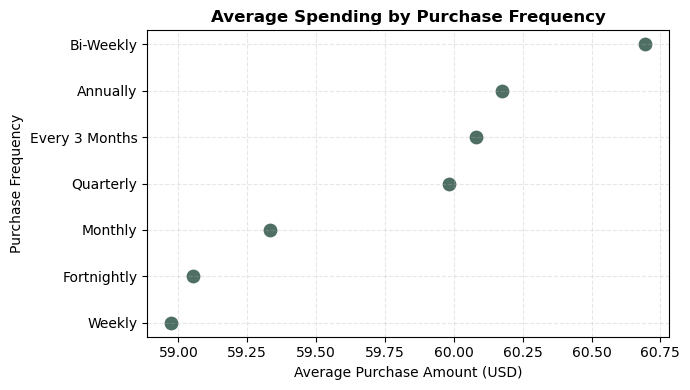

In [82]:
avg_spending_freq = (
    df.groupby("frequency_of_purchases")["purchase_amount_(usd)"]
    .mean()
    .sort_values()
)
plt.figure(figsize=(7, 4))

plt.scatter(
    avg_spending_freq.values,
    avg_spending_freq.index,
    s=80,
    color="#4f6f64"
)

plt.title("Average Spending by Purchase Frequency", fontweight="bold")
plt.xlabel("Average Purchase Amount (USD)")
plt.ylabel("Purchase Frequency")

plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


There is a slight positive correlation between mean expenditure and the number of purchases, as the chart shows.

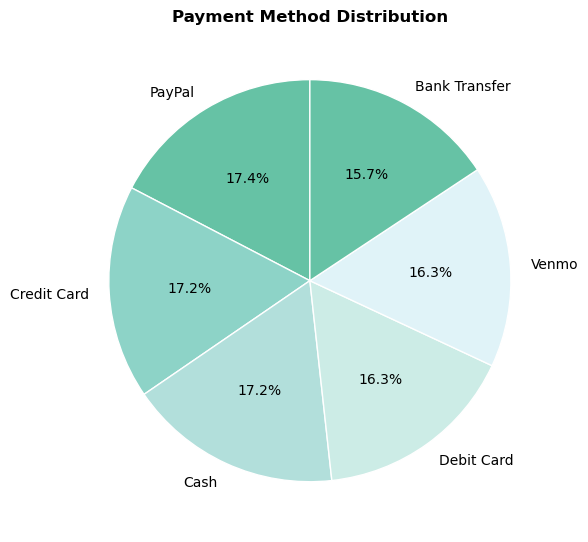

In [85]:
payment_counts = df['payment_method'].value_counts()
payment_counts
plt.figure(figsize=(6, 6))
colors = [
    "#66c2a5",
    "#8dd3c7",
    "#b2dfdb",
    "#ccece6",
    "#e0f3f8"]
plt.pie(
    payment_counts.values,
    labels=payment_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white"})
plt.title("Payment Method Distribution", fontweight="bold")
plt.tight_layout()
plt.show()

The pie chart outlines the relative distribution of transaction between diverse payment modalities, thereby highlighting consumer preferences of payment.

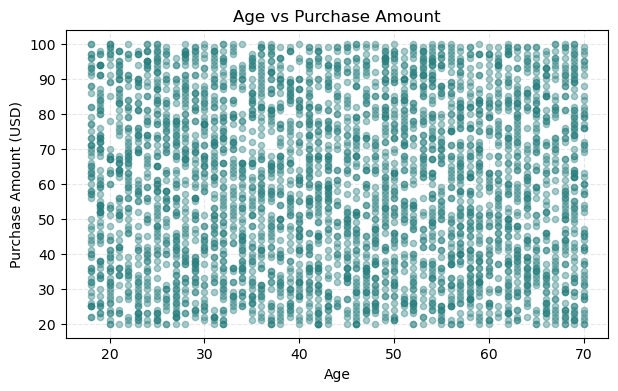

In [86]:
plt.figure(figsize=(7, 4))
plt.scatter(
    df["age"],
    df["purchase_amount_(usd)"],
    alpha=0.4,
    s=20,
    color="#2a7f7f"
)
plt.title("Age vs Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


In this scatter plot, bypass coordinate customerAge and purchaseAmount has selected to show the relationship between customerAge and purchaseAmount with the use of transparency to reduce the overlapping of points and improve the visual display.

## Conclusion 

The analysis on the dataset of customer shopping trends reveals the unbreakable importance of the entire data cleaning and transformation process in producing reliable and significantly meaningful results from real-world retail data. Standardisation of column names, correcting data-type and removing duplicate records ensured that data would be consistent and make it easier to aggregate and make a comparative analysis across multiple dimensions. A further derivation of variables, for example, age cohorts, purchase frequency segments, allowed for a more differentiated exploration of customer demographics and behavioural patterns.

Scatter plots, bar charts, line charts and pie charts were used to gain insights about how age, loyalty, subscription status and payment preferences have an impact on the way people spend their money. In particular, the analysis highlighted the importance of repeat customers and understanding how customers like to pay to improve customer experience.

Overall, this project is a comparison between the use of a phenomena such as a structured data, the pandas data frame, and some elements of effective data visualisation to be able to represent this information on a machine in a way that can be useful for a business. The results highlight the central importance of data-driven analysis in supporting well-founded decision making in a retail setting, and provide a strong foundation for more sophisticated analytical and predictive analysis for the future.

## References

CUSTOMER SHOPPING TRENDS DATASET[dataset]. Kaggle. Available at:                                       
https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset